# Numerical Exercises 01 

## Exercise 01.1
Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red"> Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ </font>.



### Data Blocking Method

In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$,the second central moment. First of all note that the variance can be computed from
$$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which use $M$ Monte Carlo "steps"; you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can useyour $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1, ..., N$, and then you have also $A^2_i$ with $i=1, ..., N$.
At this point everything becomes clear:
$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i\right)^2 $$
and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$


### Solution

To evaluate the mean value of $r$, I followed the **Data Blocking** method. Specifically, I:

- Computed the average value of $r$ within each of the `N` blocks, as the mean of `L = int(M/N)` random numbers uniformly generated in the interval [0, 1]:

```c++
for(int i = 0; i < N; i++){  // cycle over the blocks
        double sum = 0;
        for (int j = 0; j < L; j++){   // cycle over the random numbers in the block
            int k = j + i*L;  
            r[k] = rand_gen.Rannyu();
            sum += r[k]; // sum of the random numbers in the block
        }   
        ave[i] = sum/L; // mean value of the block
    }
```

- Then, progressively computed the average over blocks (along with the corresponding statistical error), by increasing the number of blocks considered at each step:

```c++
 for(int i=0; i<N; i++){
        for(int j=0; j<i+1; j++){
            sum_prog[i] += ave[j];
            su2_prog[i] += pow(ave[j], 2);
        }
        sum_prog[i] /= (i+1);
        su2_prog[i] /= (i+1);
        err_prog[i] = error(sum_prog, su2_prog, i);
    }
```

Now we look at the results. I used $N = 100$ and $M = 10^7$

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2, kstest, norm, cauchy
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'serif'

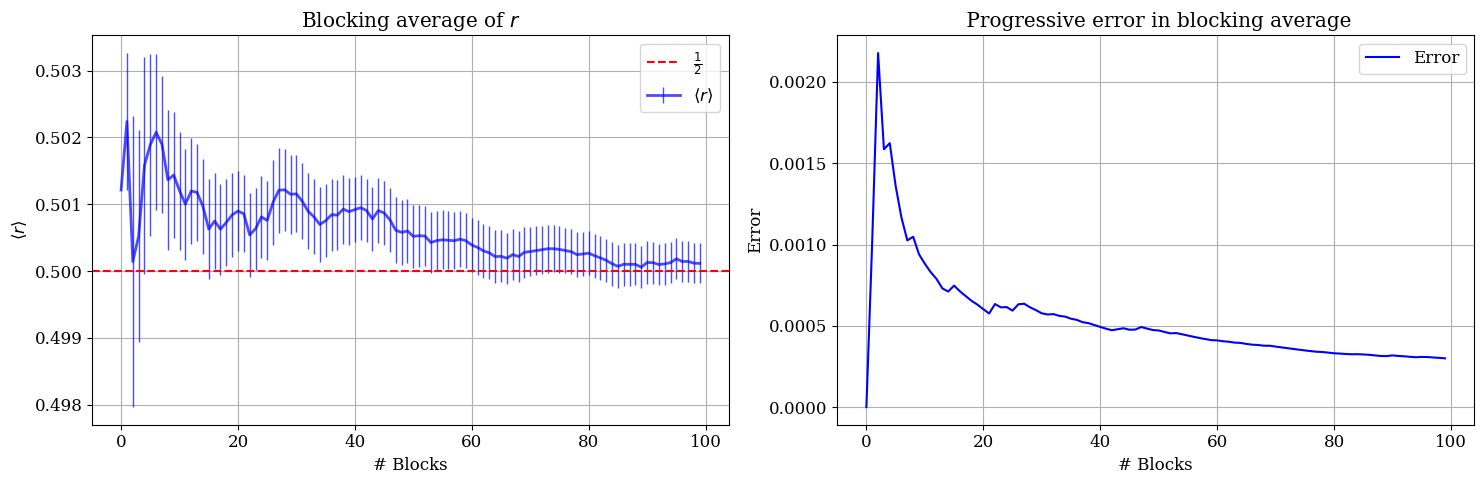

In [74]:
data_average = pd.read_csv('data/average.dat', sep=' ')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), tight_layout=True)
ax1.errorbar(
    data_average['x'], 
    data_average['sum_prog'], 
    yerr=data_average['err_prog'], 
    linewidth=2,            
    color='blue', 
    ecolor=(0, 0, 1, 0.3),       
    elinewidth=1,         
    alpha=0.7,              
    label=r'$\langle r \rangle$'
)
ax1.axhline(y=0.5, color='red', linestyle='--', label=r'$\frac{1}{2}$')
ax1.set_xlabel('# Blocks')
ax1.set_ylabel(r'$\langle r \rangle$')
ax1.set_title('Blocking average of $r$')
ax1.legend()
ax1.grid(True)

ax2.plot(
    data_average['x'], 
    data_average['err_prog'], 
    linestyle='-', 
    color='blue', 
    label='Error'
)
ax2.set_xlabel('# Blocks')
ax2.set_ylabel('Error')
ax2.set_title(' Progressive error in blocking average')
ax2.legend()
ax2.grid(True)

plt.show()

We observe that after approximately 70 blocks, the value of $\langle r \rangle$ stabilizes within the error bars. In the plot on the right, we notice a power-law decay of the error, exactly as expected based on the previous discussion.

---

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> 

### Solution

I used the same procedure as in the mean value calculation, but with a different extracted random variable.

```cpp
r[k] = pow(rand_gen.Rannyu() - 0.5, 2)
```

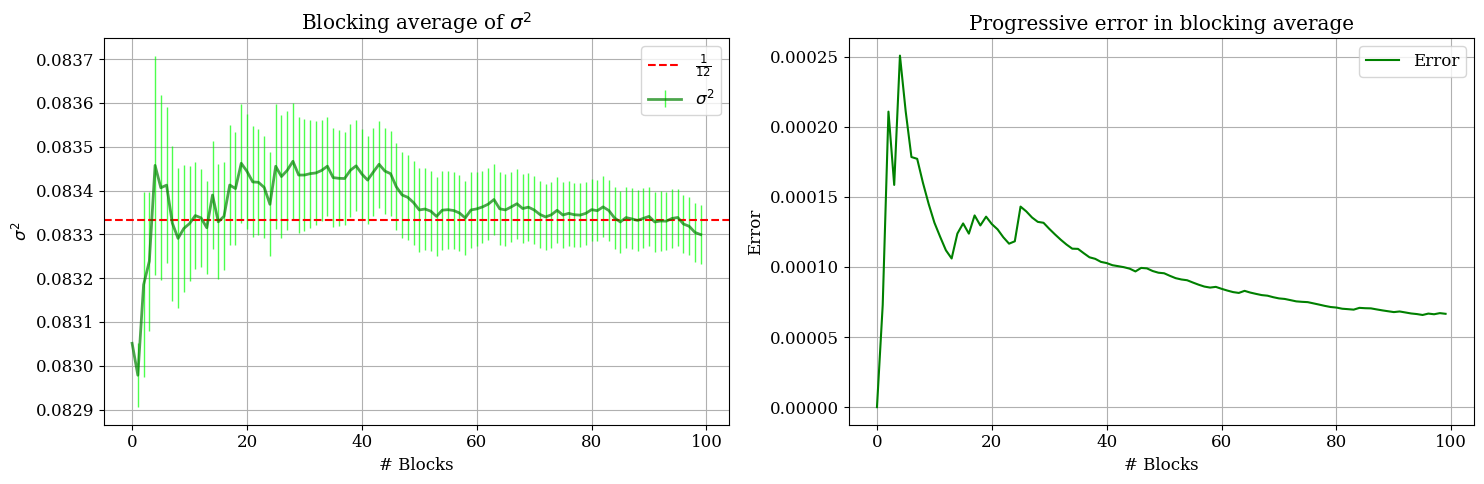

In [75]:
data_variance = pd.read_csv('data/variance.dat', sep=' ')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), tight_layout=True)

ax1.errorbar(
    data_variance['x'], 
    data_variance['sum_prog'], 
    yerr=data_variance['err_prog'], 
    linewidth=2,            
    color='green', 
    ecolor=(0, 1, 0, 0.3), 
    elinewidth=1,         
    alpha=0.7,              
    label=r'$\sigma^2$'
)
ax1.axhline(y=1/12, color='red', linestyle='--', label=r'$\frac{1}{12}$')
ax1.set_xlabel('# Blocks')
ax1.set_ylabel(r'$\sigma^2$')
ax1.set_title(r'Blocking average of $\sigma^2$')
ax1.legend()
ax1.grid(True)

ax2.plot(
    data_variance['x'], 
    data_variance['err_prog'], 
    linestyle='-', 
    color='green', 
    label='Error'
)
ax2.set_xlabel('# Blocks')
ax2.set_ylabel('Error')
ax2.set_title('Progressive error in blocking average')
ax2.legend()
ax2.grid(True)

plt.show()

Also in this case, after approximately 60 blocks, the estimated value is consistent with the theoretical one within the error bars.

---


3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. 

### Solution

In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... 

I allocated a dynamic array of size $M = 100$ and incremented the corresponding bin by 1 for each extraction (number of extractions $n = 10^4$). Then, I evaluated the chi-squared value using a dedicated function for every attempt (n_attempt = 100)

```c++
// chi^2 function
double chiSq(double *obs, int n, int M){
    double sum = 0;
    for (int i=0; i<M; i++){
        sum += pow(obs[i] - n/M, 2);
    }
    return sum/(n/M);
}

for (int i=0; i<n_attempts; i++){
        fill(obs,obs+M,0.0); // reset the array to zero
        for (int j=0;j<n;j++){
            obs[int(rand_gen.Rannyu()*M)] += 1; //generate a random number and increment the corresponding bin
        }
        chi2[i] = chiSq(obs, n, M);
    }
```


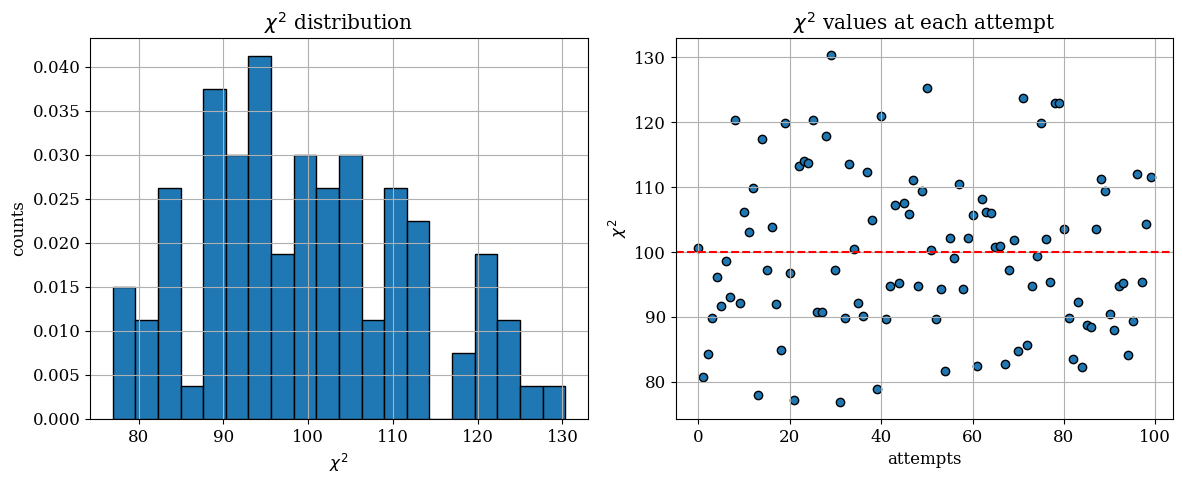

chi2 mean:  99.7964
chi2 std:  12.41784391571868


In [76]:
df_chi2 = pd.read_csv('data/chi2.dat', sep=' ')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True) 

ax1.hist(df_chi2['chi2'], density=True, bins=20, edgecolor='black')
ax1.set_xlabel(r'$\chi^2$')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.set_title(r'$\chi^2$ distribution') 

ax2.scatter(df_chi2['attempts'], df_chi2['chi2'], edgecolors='black')
ax2.axhline(y=100, color='red', linestyle='--', label='expected value')
ax2.set_xlabel('attempts')
ax2.set_ylabel(r'$\chi^2$')
ax2.grid(True)
ax2.set_title(r'$\chi^2$ values at each attempt')

plt.show()

print("chi2 mean: ",df_chi2['chi2'].mean())
print("chi2 std: ",df_chi2['chi2'].std())

We observe that the average value of $\chi^2$ is compatible with the expected one. However, to compare it with a fit, i increased the number of tests to $n_{\text{attempt}} = 1000$.

p-value: 0.07039445361700625
We cannot reject the null hypothesis; the data appears to follow a chi-squared distribution.


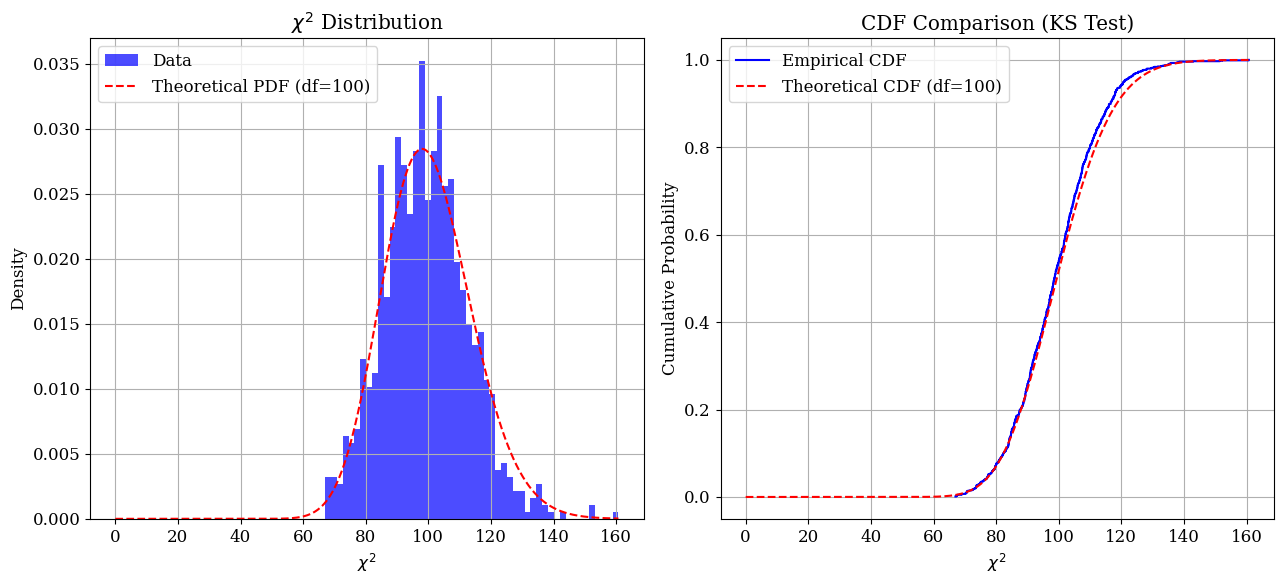

In [77]:
chi2_1000 = pd.read_csv('data/chi2_1000.dat', sep=' ')
df_theoretical = 100

ks_stat, p_value = kstest(chi2_1000['chi2'], lambda x: chi2.cdf(x, df_theoretical))
print(f"p-value: {p_value}")
print("We cannot reject the null hypothesis; the data appears to follow a chi-squared distribution." if p_value > 0.05 else "We reject the null hypothesis: the data does not follow the theoretical chi-squared distribution.")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), tight_layout=True)

x = np.linspace(0, max(chi2_1000['chi2']), 1000)
ax1.hist(chi2_1000['chi2'], density=True, bins=50, color='blue', alpha=0.7, label='Data')
ax1.plot(x, chi2.pdf(x, df_theoretical), color='red', linestyle='--', label=f'Theoretical PDF (df={df_theoretical})')
ax1.set_xlabel(r'$\chi^2$')
ax1.set_ylabel('Density')
ax1.set_title(r'$\chi^2$ Distribution')
ax1.legend()
ax1.grid(True)

sorted_data = np.sort(chi2_1000['chi2'])
empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
theoretical_cdf = chi2.cdf(x, df_theoretical)
ax2.step(sorted_data, empirical_cdf, where='post', label='Empirical CDF', color='blue')
ax2.plot(x, theoretical_cdf, label=f'Theoretical CDF (df={df_theoretical})', color='red', linestyle='--')
ax2.set_xlabel(r'$\chi^2$')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('CDF Comparison (KS Test)')
ax2.legend()
ax2.grid(True)

plt.show()

## Exercise 01.2

- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

## Solution

### Method of the inversion of the cumulative distribution

The inverse transform method is a technique used to sample points according to a probability distribution $p(x)$ whose cumulative distribution function (CDF) is analytically invertible. This is done by transforming random numbers sampled from a distribution we can easily generate — in our case, a uniform distribution in the interval [0, 1].

The cumulative distribution function of a probability density function $p(x)$ is defined as:

$$
F(x) = \int_{-\infty}^x p(t) \, dt
$$

and takes values in the interval [0, 1].

The idea behind the method is the following: if we can compute the inverse of the CDF, $F^{-1}(y)$, then we can generate a random variable $x$ with the desired distribution $p(x)$ by drawing a uniform random number $y \in [0, 1]$ and setting:

$$
x = F^{-1}(y)
$$

In this way, the transformation maps uniform random numbers into samples that follow the target distribution.


By performing the calculations, we obtain:

- For the exponential distribution:  
  $$ y = -\frac{\ln(1 - p)}{\lambda} $$

- For the Cauchy-Lorentz distribution:  
  $$ y = \mu + \gamma \tan\left[\pi\left(p - \frac{1}{2}\right)\right] $$

where $p$ is a random number uniformly sampled in the interval [0, 1).

I therefore added two methods to the `random.h` class to generate random numbers according to these two distributions.

```c++
// generate a random number with an exponential distribution
double Random :: Exponential(double lambda){
   return -log(1. - Rannyu())/lambda;
}
// generate a random number with a Cauchy-Lorentz distribution
double Random :: Lorentz(double mu, double Gamma){
   double x = Rannyu();
   return mu + Gamma*tan(M_PI*(x - 0.5));
}
```

### Central limit theorem

The Central Limit Theorem states that, given a collection of $N$ independent and identically distributed random variables with finite mean and variance, the variable constructed by summing these random variables follows a Gaussian distribution in the limit of $N \to \infty$.

In the C++ code, I constructed the sum variable:

$$
S_N = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

with $N = 1, 2, 10, 100$, repeating each sampling process $10^4$ times for the three different distributions.

```c++
 const int N[4] = {1, 2, 10, 100};

for (int i = 0; i < realizations; i++) {
        for (int k = 0; k < 4; k++) {
            double sum_std = 0.0, sum_exp = 0.0, sum_cauchy = 0.0;
            for (int j = 0; j < N[k]; j++) {
                sum_std += rand_gen.Rannyu();
                sum_exp += rand_gen.Exponential();
                sum_cauchy += rand_gen.Lorentz(0.0, 1.0);
            }
            s_std[k]   = sum_std / N[k];
            s_exp[k]   = sum_exp / N[k];
            s_cauchy[k] = sum_cauchy / N[k];
        }

        // ...
    }
```




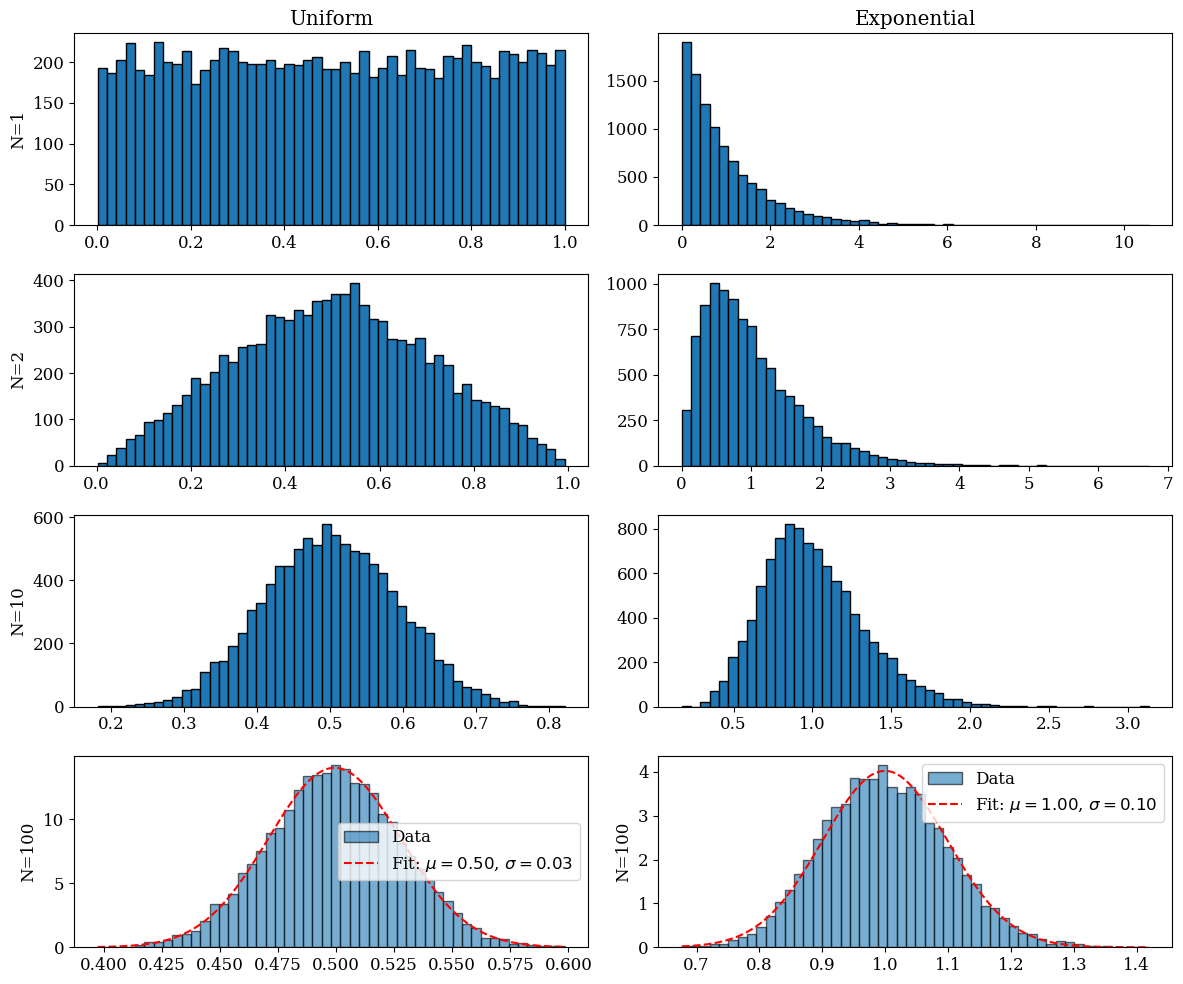

In [78]:
std_dice = pd.read_csv('data/std_dice.dat', sep=' ')
exp_dice = pd.read_csv('data/exp_dice.dat', sep=' ')

fig, ax = plt.subplots(4, 2, figsize=(12, 10), tight_layout=True)

ax[0, 0].set_title('Uniform')
ax[0, 1].set_title('Exponential')

ax[0, 0].hist(std_dice['N1'], bins=50, edgecolor='black', label=r'standard dice')
ax[0, 1].hist(exp_dice['N1'], bins=50, edgecolor='black', label=r'exponential dice $\lambda=1$')
ax[0, 0].set_ylabel('N=1')


ax[1, 0].hist(std_dice['N2'], bins=50, edgecolor='black', label=r'standard dice')
ax[1, 1].hist(exp_dice['N2'], bins=50, edgecolor='black', label=r'exponential dice $\lambda=1$')
ax[1, 0].set_ylabel('N=2')

#
ax[2, 0].hist(std_dice['N10'], bins=50, edgecolor='black', label=r'standard dice')
ax[2, 1].hist(exp_dice['N10'], bins=50, edgecolor='black', label=r'exponential dice $\lambda=1$')
ax[2, 0].set_ylabel('N=10')

data_uniform = std_dice['N100']
mu_uniform, std_uniform = norm.fit(data_uniform)
x_uniform = np.linspace(min(data_uniform), max(data_uniform), 1000)
pdf_uniform = norm.pdf(x_uniform, mu_uniform, std_uniform)
ax[3, 0].hist(data_uniform, bins=50, density=True, edgecolor='black', alpha=0.6, label='Data')
ax[3, 0].plot(x_uniform, pdf_uniform, 'r--', label=f'Fit: $\mu={mu_uniform:.2f}$, $\sigma={std_uniform:.2f}$')
ax[3, 0].set_ylabel('N=100')
ax[3, 0].legend()

data_exponential = exp_dice['N100']
mu_exponential, std_exponential = norm.fit(data_exponential)
x_exponential = np.linspace(min(data_exponential), max(data_exponential), 1000)
pdf_exponential = norm.pdf(x_exponential, mu_exponential, std_exponential)
ax[3, 1].hist(data_exponential, bins=50, density=True, edgecolor='black', alpha=0.6, label='Data')
ax[3, 1].plot(x_exponential, pdf_exponential, 'r--', label=f'Fit: $\mu={mu_exponential:.2f}$, $\sigma={std_exponential:.2f}$')
ax[3, 1].set_ylabel('N=100')
ax[3, 1].legend()

plt.show()

From the plots, we can observe that even with $N = 100$, there is already a very good agreement with a Gaussian fit for both the uniform and exponential distributions.

Regarding the Cauchy-Lorentz distribution, since it does not have a finite variance, it does not satisfy the assumptions of the Central Limit Theorem (CLT). However, an extended version of the theorem exists for Cauchy-distributed variables, which states that given a collection of Cauchy-Lorentz random variables, their sum will also follow a Cauchy distribution in the limit of large $N$.


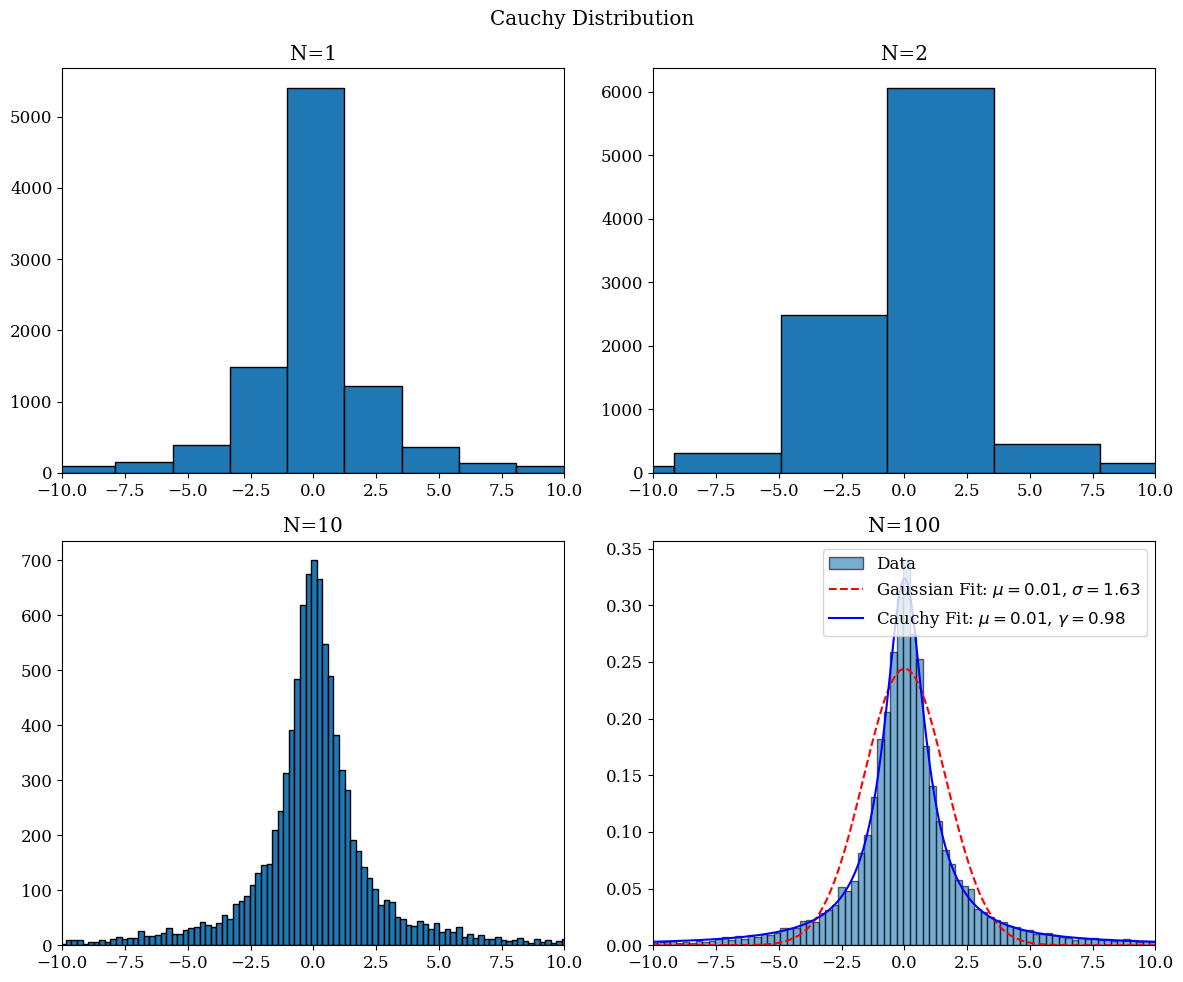

In [79]:
cauchy_dice = pd.read_csv('data/cauchy_dice.dat', sep=' ')

fig, ax = plt.subplots(2, 2, figsize=(12, 10), tight_layout=True)
plt.suptitle('Cauchy Distribution')

ax[0, 0].hist(cauchy_dice['N1'], bins=10000, edgecolor='black', label=r'Cauchy $\mu=0$, $\gamma=1.5$')
ax[0, 0].set_xlim([-10, 10])
ax[0, 0].set_title('N=1')

ax[0, 1].hist(cauchy_dice['N2'], bins=10000, edgecolor='black', label=r'Cauchy $\mu=0$, $\gamma=1.5$')
ax[0, 1].set_xlim([-10, 10])
ax[0, 1].set_title('N=2')

ax[1, 0].hist(cauchy_dice['N10'], bins=10000, edgecolor='black', label=r'Cauchy $\mu=0$, $\gamma=1.5$')
ax[1, 0].set_xlim([-10, 10])
ax[1, 0].set_title('N=10')

data_n100 = cauchy_dice['N100']
data_central = data_n100[np.abs(data_n100) < 5] 
ax[1, 1].hist(data_n100, bins=10000, density=True, edgecolor='black', alpha=0.6, label='Data')

mu_gauss, sigma_gauss = norm.fit(data_central)
x = np.linspace(-10, 10, 1000)
pdf_gauss = norm.pdf(x, mu_gauss, sigma_gauss)
ax[1, 1].plot(x, pdf_gauss, 'r--', label=f'Gaussian Fit: $\mu={mu_gauss:.2f}$, $\sigma={sigma_gauss:.2f}$')

loc_cauchy, scale_cauchy = cauchy.fit(data_n100)
pdf_cauchy = cauchy.pdf(x, loc_cauchy, scale_cauchy)
ax[1, 1].plot(x, pdf_cauchy, 'b-', label=f'Cauchy Fit: $\mu={loc_cauchy:.2f}$, $\gamma={scale_cauchy:.2f}$')

ax[1, 1].set_xlim([-10, 10])
ax[1, 1].set_title('N=100')
ax[1, 1].legend()

plt.show()

We can observe from the plots that as the value of $N$ increases, the resulting distribution does not follow a Gaussian shape but instead converges to a Cauchy-Lorentz distribution.


## Exercise 01.3

- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### Solution

To evaluate $\pi$ using the Buffon's needle experiment, I followed the object-oriented programming paradigm by creating a `Buffon` class that contains two main methods.

```c++
 bool throwNeedle()
 ```
 
This method simulates the throwing of a needle and returns `true` if it intersects one of the lines. More specifically:

- sample uniformly the center of the needle with `double y_center = rand_gen.Rannyu(0., d)`

- then sample the orientation of the needle using rejection method on the unit disk
```c++
do {
    x_dir = rand_gen.Rannyu(-1., 1.); 
    y_dir = rand_gen.Rannyu(-1., 1.); 
    norm = sqrt(x_dir*x_dir + y_dir*y_dir);
} while (norm >= 1.0 || norm == 0.0); 
```

- finally, check if the needle intersects the line by evaluating the vertical projection of the needle on the y-axis, if the minimum or maximum y coordinate of the needle is less than 0 or more than $d$ repectively the needle intersects the line.

The other method is 
```c++
void simulate(std::string filename)
```

This method evaluates the blocking average of $\pi$. In my case, I used $10^7$ throws for each of the 100 total blocks.



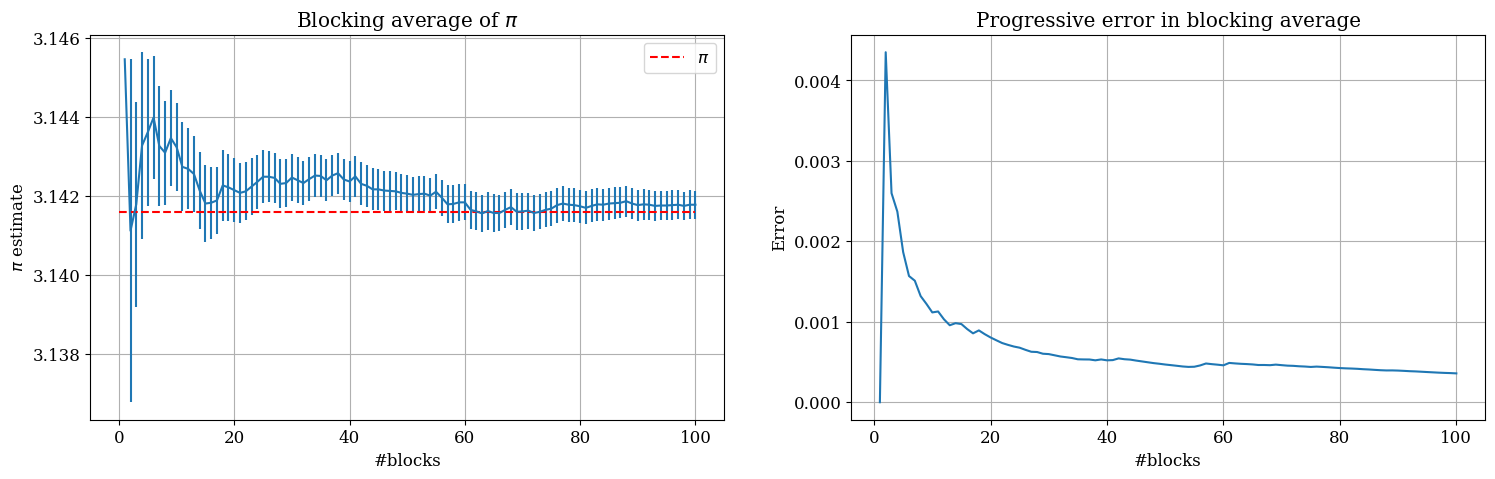

In [80]:
pi_data = pd.read_csv('data/Buffon.dat', sep=' ')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

ax1.errorbar(pi_data['#Blocks'], pi_data['Estimate'], yerr=pi_data['Error'])
ax1.hlines(y=np.pi, xmin=0, xmax=100, color='r', linestyle='--', label=r'$\pi$')
ax1.set_xlabel('#blocks')
ax1.set_ylabel(r'$\pi$ estimate')
ax1.set_title(r'Blocking average of $\pi$')
ax1.legend()
ax1.grid(True)

ax2.plot(pi_data['#Blocks'], pi_data['Error'])
ax2.set_xlabel('#blocks')
ax2.set_ylabel('Error')
ax2.set_title('Progressive error in blocking average')
ax2.grid(True)

plt.show()

From this plot we see that the value of $\pi$ converges to the expected value after about 50 blocks. The error bars also decrease as expected, following a power law decay. The final value of $\pi$ is compatible with the expected one within the error bars.